#Exploration Part
###Project Problems:
#####How to predict the Laptop price?
This part contains the data exploration before we decide how to solve problem.

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [ ]:
path = 'gdrive/MyDrive/DATA/Laptop Price/'

In [ ]:
os.listdir(path)

['laptop_price.csv']

##Get the Data

In [ ]:
df = pd.read_csv(path + 'laptop_price.csv', encoding='latin-1')

In [ ]:
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [ ]:
df.shape

(1303, 13)

In [ ]:
df.columns

Index(['laptop_ID', 'Company', 'Product', 'TypeName', 'Inches',
       'ScreenResolution', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight',
       'Price_euros'],
      dtype='object')

In [ ]:
#### predictor
col_num =[ 'Inches', 'Weight','Ram'] ## --> pure number
col_cat =['Company','Product','TypeName','OpSys'] ## --> categorical
col_campuran = ['ScreenResolution','Cpu','Memory','Gpu'] ## --> bisa diparsing (dipisah stringnya)
other_col=list(set(df.columns)-set(col_num+col_cat+col_campuran)) ## --> others

In [ ]:
other_col

['Price_euros', 'laptop_ID']

In [ ]:
## Predictor --> column2/ feature2 yang digunakan untuk memprediksi

In [ ]:
col_target=['Price_euros']

## Target Distribution

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


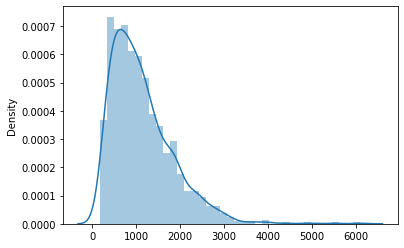

In [ ]:
sns.distplot(df[col_target])
plt.show()

## Numerical Columns

In [ ]:
def clean_measure(x):
  try:
    x1=float(x)
  except:
    x1 = x.replace('kg','')
    x1 = x1.replace('GB','')
    x1 = float(x1)
  
  return x1

In [ ]:
col_num

['Inches', 'Weight', 'Ram']

In [ ]:
df[col_num].head()

,Inches,Weight,Ram
0,13.3,1.37kg,8GB
1,13.3,1.34kg,8GB
2,15.6,1.86kg,8GB
3,15.4,1.83kg,16GB
4,13.3,1.37kg,8GB


In [ ]:
col_num2=[]
for c in col_num:
  df[c+'2']=df[c].apply(clean_measure)
  col_num2.append(c+'2')

In [ ]:
df[col_num2].head()

,Inches2,Weight2,Ram2
0,13.3,1.37,8.0
1,13.3,1.34,8.0
2,15.6,1.86,8.0
3,15.4,1.83,16.0
4,13.3,1.37,8.0


In [ ]:
df[col_num2+col_target].corr()[col_target]

,Price_euros
Inches2,0.068197
Weight2,0.210370
Ram2,0.743007
Price_euros,1.000000


In [ ]:
df[col_num2].describe()

,Inches2,Weight2,Ram2
count,1303.000000,1303.000000,1303.000000
mean,15.017191,2.038734,8.382195
std,1.426304,0.665475,5.084665
min,10.100000,0.690000,2.000000
25%,14.000000,1.500000,4.000000
50%,15.600000,2.040000,8.000000
75%,15.600000,2.300000,8.000000
max,18.400000,4.700000,64.000000


##Categorical Columns

In [ ]:
col_cat

['Company', 'Product', 'TypeName', 'OpSys']

In [ ]:
df[col_cat].describe()

,Company,Product,TypeName,OpSys
count,1303,1303,1303,1303
unique,19,618,6,9
top,Dell,XPS 13,Notebook,Windows 10
freq,297,30,727,1072


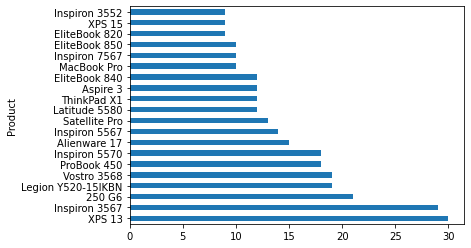

In [ ]:
## product

prod_summary=df.groupby('Product').size().sort_values(ascending=False)
prod_summary[:20].plot(kind='barh')
plt.show()

In [ ]:
## Company
company_summary=df.groupby('Company').size().sort_values(ascending=False)
#company_summary[:20].plot(kind='barh')
#plt.show()
company_summary[:8]

Company
Dell       297
Lenovo     297
HP         274
Asus       158
Acer       103
MSI         54
Toshiba     48
Apple       21
dtype: int64

In [ ]:
## OpSys
opsys_summary=df.groupby('OpSys').size().sort_values(ascending=False)
#opsys_summary[:20].plot(kind='barh')
#plt.show()
opsys_summary[:20]

OpSys
Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         27
macOS             13
Windows 10 S       8
Mac OS X           8
Android            2
dtype: int64

In [ ]:
## TypeName
typename_summary=df.groupby('TypeName').size().sort_values(ascending=False)
#typename_summary[:20].plot(kind='barh')
#plt.show()
typename_summary[:20]

TypeName
Notebook              727
Gaming                205
Ultrabook             196
2 in 1 Convertible    121
Workstation            29
Netbook                25
dtype: int64

In [ ]:
df['Product2']=df['Product'].apply(lambda x: x.split(' ')[0])
df['Company2']=np.where(df['Company'].isin(company_summary[:8].index),
                        df['Company'],
                        'others')

In [ ]:
df[col_cat+['Product2']+['Company2']].describe()

,Company,Product,TypeName,OpSys,Product2,Company2
count,1303,1303,1303,1303,1303,1303
unique,19,618,6,9,226,9
top,Dell,XPS 13,Notebook,Windows 10,Inspiron,Dell
freq,297,30,727,1072,141,297


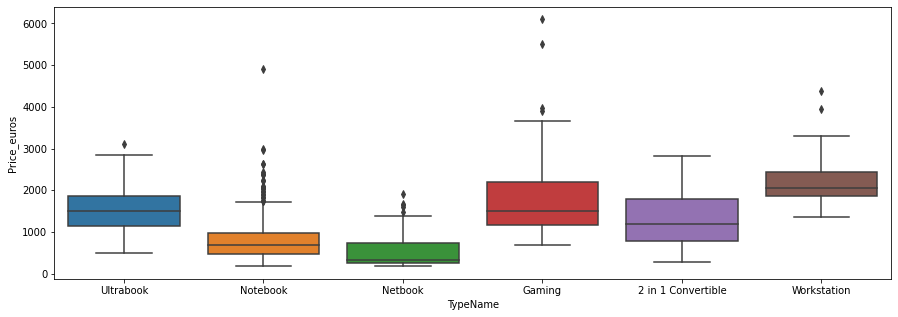

In [ ]:
col_cat2=['Product2',	'Company2', 'OpSys', 'TypeName']

cat=col_cat2[3]
plt.figure(figsize=(15,5))
sns.boxplot(data = df, y=col_target[0], x=cat)
plt.show()

In [ ]:
df.to_csv(path + 'laptop_price_interim.csv',index=False)

In [ ]:
os.listdir(path)

['laptop_price.csv', 'laptop_price_interim.csv']